In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('student_data.csv')
data.head(10)

,student_id,age,percentage,m1,m2,gender
0,1.0,16.0,88.0,70.0,88.0,m
1,2.0,NaN,78.0,80.0,77.0,f
2,3.0,16.0,89.0,70.0,94.0,m
3,4.0,17.0,67.0,NaN,79.0,m
4,5.0,18.0,NaN,99.0,59.0,NaN
5,6.0,16.0,66.0,76.0,NaN,m
6,7.0,17.0,57.0,78.0,78.0,m
7,8.0,17.0,NaN,67.0,67.0,m
8,NaN,NaN,66.0,87.0,89.0,f
9,10.0,16.0,90.0,NaN,78.0,m


In [80]:
data.drop(columns=['student_id'], inplace=True)

In [81]:
data.head(10)

,age,percentage,m1,m2,gender
0,16.0,88.0,70.0,88.0,m
1,NaN,78.0,80.0,77.0,f
2,16.0,89.0,70.0,94.0,m
3,17.0,67.0,NaN,79.0,m
4,18.0,NaN,99.0,59.0,NaN
5,16.0,66.0,76.0,NaN,m
6,17.0,57.0,78.0,78.0,m
7,17.0,NaN,67.0,67.0,m
8,NaN,66.0,87.0,89.0,f
9,16.0,90.0,NaN,78.0,m


In [120]:
#for filling the categorial data

gender_mode = data['gender'].mode()[0]
data['gender'].fillna(gender_mode, inplace=True)

In [121]:
data.head(10)

,student_id,age,percentage,m1,m2,gender
0,1.0,16.0,88.0,70.0,88.0,m
1,2.0,NaN,78.0,80.0,77.0,f
2,3.0,16.0,89.0,70.0,94.0,m
3,4.0,17.0,67.0,NaN,79.0,m
4,5.0,18.0,NaN,99.0,59.0,m
5,6.0,16.0,66.0,76.0,NaN,m
6,7.0,17.0,57.0,78.0,78.0,m
7,8.0,17.0,NaN,67.0,67.0,m
8,NaN,NaN,66.0,87.0,89.0,f
9,10.0,16.0,90.0,NaN,78.0,m


In [122]:
data.isna().sum()

student_id    1
age           2
percentage    2
m1            2
m2            1
gender        0
dtype: int64

In [123]:
m1_mean=data['m1'].mean()
print(m1_mean)
m2_mean=data['m2'].mean()
print(m2_mean)
percentage_mean=data['percentage'].mean()
print(percentage_mean)
age_mean=data['age'].mean()
print(age_mean)

78.375
78.77777777777777
75.125
16.625


In [124]:
data['m1'].fillna(m1_mean, inplace=True)
data['m2'].fillna(m2_mean, inplace=True)
data['percentage'].fillna(percentage_mean, inplace=True)
data['age'].fillna(age_mean, inplace=True)

In [94]:
data.isna().sum()

age           0
percentage    0
m1            0
m2            0
gender        0
dtype: int64

In [125]:
data.head(10)

,student_id,age,percentage,m1,m2,gender
0,1.0,16.000,88.000,70.000,88.000000,m
1,2.0,16.625,78.000,80.000,77.000000,f
2,3.0,16.000,89.000,70.000,94.000000,m
3,4.0,17.000,67.000,78.375,79.000000,m
4,5.0,18.000,75.125,99.000,59.000000,m
5,6.0,16.000,66.000,76.000,78.777778,m
6,7.0,17.000,57.000,78.000,78.000000,m
7,8.0,17.000,75.125,67.000,67.000000,m
8,NaN,16.625,66.000,87.000,89.000000,f
9,10.0,16.000,90.000,78.375,78.000000,m


In [126]:
#convert float to int
data['age'] = data['age'].astype(int)

In [127]:
data.head(10)

,student_id,age,percentage,m1,m2,gender
0,1.0,16,88.000,70.000,88.000000,m
1,2.0,16,78.000,80.000,77.000000,f
2,3.0,16,89.000,70.000,94.000000,m
3,4.0,17,67.000,78.375,79.000000,m
4,5.0,18,75.125,99.000,59.000000,m
5,6.0,16,66.000,76.000,78.777778,m
6,7.0,17,57.000,78.000,78.000000,m
7,8.0,17,75.125,67.000,67.000000,m
8,NaN,16,66.000,87.000,89.000000,f
9,10.0,16,90.000,78.375,78.000000,m


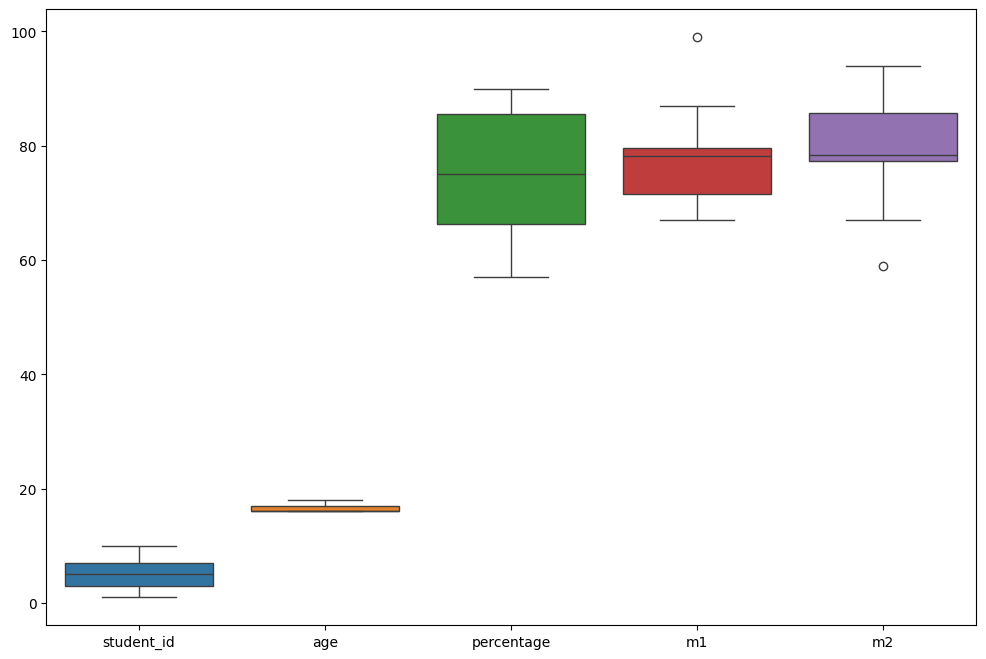

In [128]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data)
plt.show()

In [129]:
q1=data['m1'].quantile(0.25)

In [130]:
q3=data['m1'].quantile(0.75)

In [131]:
q3

79.59375

In [132]:
iqr=q3-q1
iqr

8.09375

In [133]:
lb=q1-1.5*iqr
up=q3+1.5*iqr
print(lb)
print(up)

59.359375
91.734375


In [134]:
data=data[(data['m1']>lb) & (data['m1']<up)]


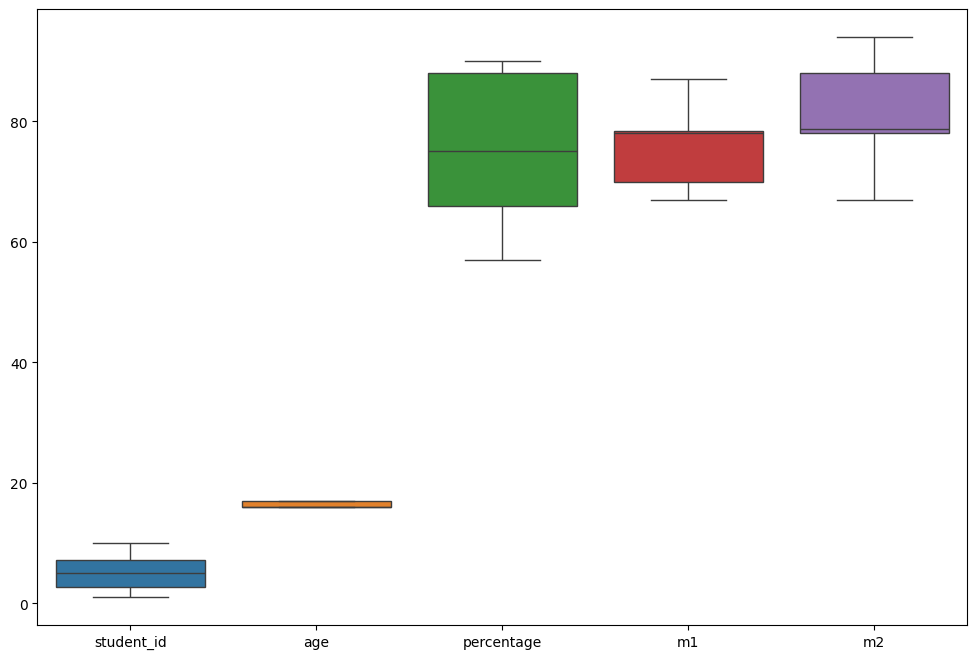

In [135]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data)
plt.show()

In [136]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit_transform(data[['m2']])

array([[ 0.92333151],
       [-0.52251801],
       [ 1.7119767 ],
       [-0.25963628],
       [-0.28884536],
       [-0.39107714],
       [-1.83692666],
       [ 1.05477238],
       [-0.39107714]])

In [137]:
data

,student_id,age,percentage,m1,m2,gender
0,1.0,16,88.000,70.000,88.000000,m
1,2.0,16,78.000,80.000,77.000000,f
2,3.0,16,89.000,70.000,94.000000,m
3,4.0,17,67.000,78.375,79.000000,m
5,6.0,16,66.000,76.000,78.777778,m
6,7.0,17,57.000,78.000,78.000000,m
7,8.0,17,75.125,67.000,67.000000,m
8,NaN,16,66.000,87.000,89.000000,f
9,10.0,16,90.000,78.375,78.000000,m


In [118]:
data=pd.read_csv('student_data.csv')